# **Topic 7 Regression**

**Gajitos, Jude B.**

**BSCS 3B**

# **1. Data Preprocessing**

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

netflix = pd.read_csv('Netflix_Userbase.csv')
print(netflix.head())

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


In [113]:
missing_values = netflix.isnull().sum() #Handle Missing Values
print(missing_values)


# Encode categorical variables with Pandas get_dummies
categorical_cols = ["Subscription Type", "Country", "Gender", "Device", "Plan Duration"]
df_dummies = pd.get_dummies(netflix, columns=categorical_cols, drop_first=True)  # Drop first category to avoid dummy trap
print(df_dummies.columns)


# Feature Selection
x = pd.DataFrame(df_dummies, columns = ['Age', 'Subscription Type_Premium', 'Subscription Type_Standard','Country_Brazil',
                                        'Country_Canada', 'Country_France', 'Country_Germany', 'Country_Italy', 'Country_Mexico',
                                        'Country_Spain', 'Country_United Kingdom', 'Country_United States', 'Gender_Male',
                                        'Device_Smart TV', 'Device_Smartphone', 'Device_Tablet'])
y = df_dummies['Monthly Revenue']

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
Proxy Feedback       0
dtype: int64
Index(['User ID', 'Monthly Revenue', 'Join Date', 'Last Payment Date', 'Age',
       'Proxy Feedback', 'Subscription Type_Premium',
       'Subscription Type_Standard', 'Country_Brazil', 'Country_Canada',
       'Country_France', 'Country_Germany', 'Country_Italy', 'Country_Mexico',
       'Country_Spain', 'Country_United Kingdom', 'Country_United States',
       'Gender_Male', 'Device_Smart TV', 'Device_Smartphone', 'Device_Tablet'],
      dtype='object')


# **2.  Exploratory Data Analysis (EDA)**

In [96]:
9# Descriptive Analysis using .describe()
print(netflix.describe())

          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


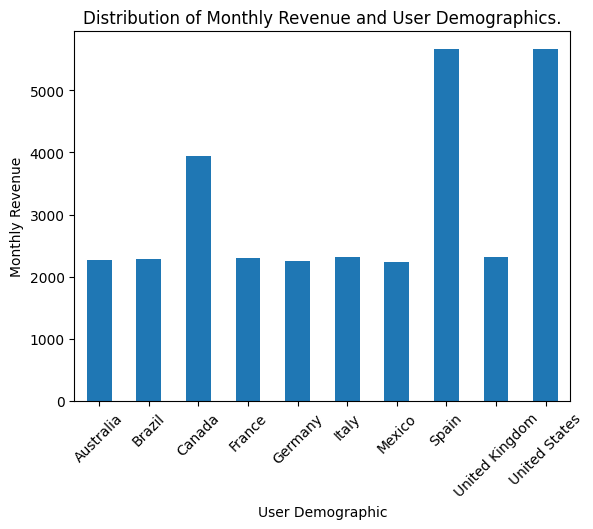

In [59]:
# Visualization
# Distribution of Monthly Revenue, user demographics
import matplotlib.pyplot as plt
import seaborn as sns
rev_demographic = netflix.groupby('Country')['Monthly Revenue'].sum()
rev_demographic.plot(kind = 'bar')
plt.xlabel("User Demographic")
plt.ylabel("Monthly Revenue")
plt.title("Distribution of Monthly Revenue and User Demographics.")
plt.xticks(rotation = 45)
plt.show()

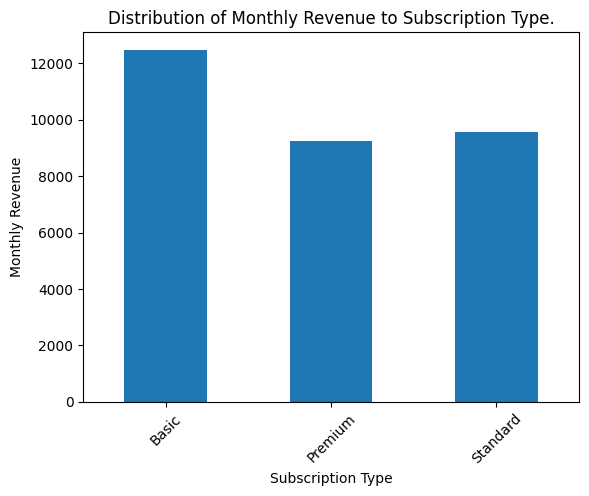

In [ ]:
# Distribution of Monthly Revenue to Subscription Type
rev_subs = netflix.groupby('Subscription Type')['Monthly Revenue'].sum()
rev_subs.plot(kind = 'bar')
plt.xlabel("Subscription Type")
plt.ylabel("Monthly Revenue")
plt.title("Distribution of Monthly Revenue to Subscription Type.")
plt.xticks(rotation = 45)
plt.show()

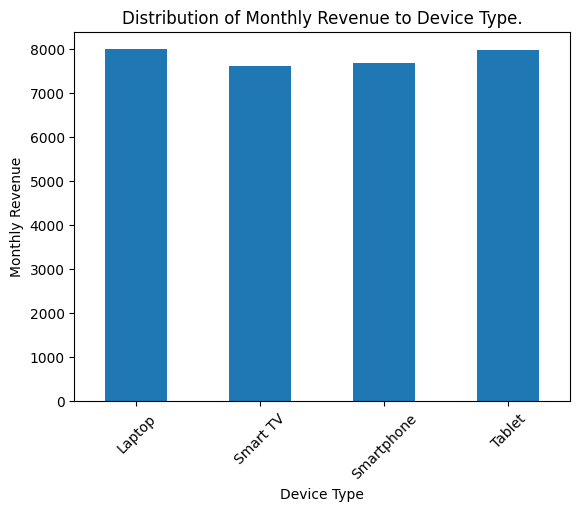

In [ ]:
# Distribution of Monthly Revenue to Device Type
rev_device = netflix.groupby('Device')['Monthly Revenue'].sum()
rev_device.plot(kind = 'bar')
plt.xlabel("Device Type")
plt.ylabel("Monthly Revenue")
plt.title("Distribution of Monthly Revenue to Device Type.")
plt.xticks(rotation = 45)
plt.show()

# **3. Linear Regression Model (Predicting Monthly Revenue)**

In [97]:
# Split the Data into Training and Test set
x_train, x_test, y_train, y_test, = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [98]:
# Building the Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [99]:
# Prediction
y_pred = model.predict(x_test)

In [100]:
# Model Evaluation using metric Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.8189145806989573


# **4. Logistic Regression Model**

In [118]:
positive_criteria = (df_dummies['Monthly Revenue'] >= 12.50)
negative_criteria = (df_dummies['Monthly Revenue'] < 12.50)
# Define target variable and features
df_dummies['Proxy Feedback'] = None

# Apply criteria to categorize feedback as positive or negative
df_dummies.loc[positive_criteria, 'Proxy Feedback'] = 'Positive'
df_dummies.loc[negative_criteria, 'Proxy Feedback'] = 'Negative'

# Feature Selection
x = pd.DataFrame(df_dummies, columns = ['Age', 'Subscription Type_Premium', 'Subscription Type_Standard','Country_Brazil',
                                        'Country_Canada', 'Country_France', 'Country_Germany', 'Country_Italy', 'Country_Mexico',
                                        'Country_Spain', 'Country_United Kingdom', 'Country_United States', 'Gender_Male',
                                        'Device_Smart TV', 'Device_Smartphone', 'Device_Tablet'])
y = df_dummies['Proxy Feedback']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Building the Model
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(x_test_scaled)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')
print(f'Classification Report: \n{class_report}')

Accuracy: 0.466
Confusion Matrix: 
[[120 137]
 [130 113]]
Classification Report: 
              precision    recall  f1-score   support

    Negative       0.48      0.47      0.47       257
    Positive       0.45      0.47      0.46       243

    accuracy                           0.47       500
   macro avg       0.47      0.47      0.47       500
weighted avg       0.47      0.47      0.47       500



# **5. Comparative Analysis and Visualization**

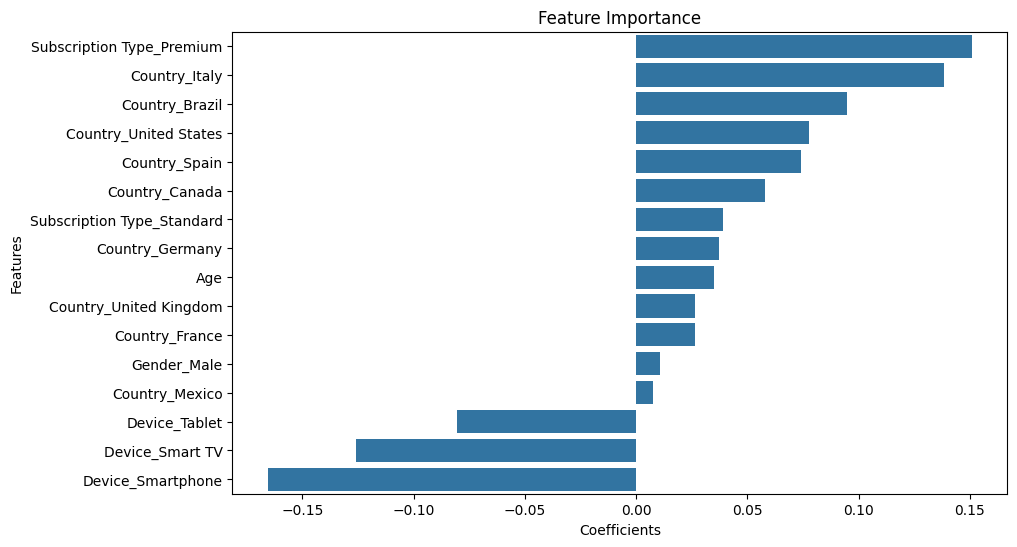

In [119]:
# Visualize the importance of different features in your logistic regression model.
feature_importance = pd.Series(model.coef_[0], index = x.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.show()